In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

LOAD THE DATASET

In [ ]:
chip = pd.read_csv('/content/chip_dataset.csv')

EXPLORING THE DATASET

In [ ]:
chip.shape

(4854, 14)

In [ ]:
chip.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


In [ ]:
chip.head(3)

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN


In [ ]:
chip.tail(3)

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN
4853,4853,NVIDIA GeForce 9300 SE,GPU,2008-06-01,65.0,NaN,86.0,210.0,540.0,TSMC,NVIDIA,NaN,20.8,NaN


In [ ]:
chip.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [ ]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

DROP UNNECESSARY COLUMNS

In [ ]:
chip.drop(columns = ['Unnamed: 0','FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS','Foundry'], inplace = True )

In [ ]:
chip.drop(columns = ['Product','Type', 'Vendor'], inplace = True )

In [ ]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4854 non-null   object 
 1   Type                   4854 non-null   object 
 2   Release Date           4854 non-null   object 
 3   Process Size (nm)      4845 non-null   float64
 4   TDP (W)                4228 non-null   float64
 5   Die Size (mm^2)        4139 non-null   float64
 6   Transistors (million)  4143 non-null   float64
 7   Freq (MHz)             4854 non-null   float64
 8   Vendor                 4854 non-null   object 
dtypes: float64(5), object(4)
memory usage: 341.4+ KB


FILL MISSING VALUES

In [ ]:
chip['TDP (W)'].fillna(value = chip['TDP (W)'].mean(), inplace = True)
chip['Die Size (mm^2)'].fillna(value = chip['Die Size (mm^2)'].mean(), inplace = True)
chip['Transistors (million)'].fillna(value = chip['Transistors (million)'].mean(), inplace = True)

/tmp/ipython-input-1636724250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip['TDP (W)'].fillna(value = chip['TDP (W)'].mean(), inplace = True)
/tmp/ipython-input-1636724250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4854 non-null   object 
 1   Type                   4854 non-null   object 
 2   Release Date           4854 non-null   object 
 3   Process Size (nm)      4845 non-null   float64
 4   TDP (W)                4854 non-null   float64
 5   Die Size (mm^2)        4854 non-null   float64
 6   Transistors (million)  4854 non-null   float64
 7   Freq (MHz)             4854 non-null   float64
 8   Vendor                 4854 non-null   object 
dtypes: float64(5), object(4)
memory usage: 341.4+ KB


DATE FORMAT

In [ ]:
chip['Release Date'] = pd.to_datetime(chip['Release Date'])

In [ ]:
chip.head(3)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.000000,122.000000,2200.0,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.000000,4800.000000,3200.0,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,188.440445,1929.922279,2600.0,Intel


In [ ]:
chip['Release Year'] = chip['Release Date'].dt.year
chip['Release Month'] = chip['Release Date'].dt.month
chip['Release Day'] = chip['Release Date'].dt.day

EDA

In [ ]:
chip.sort_values(by='Release Year', ascending = False, inplace=True)

Text(0, 0.5, 'Number of Transistors')

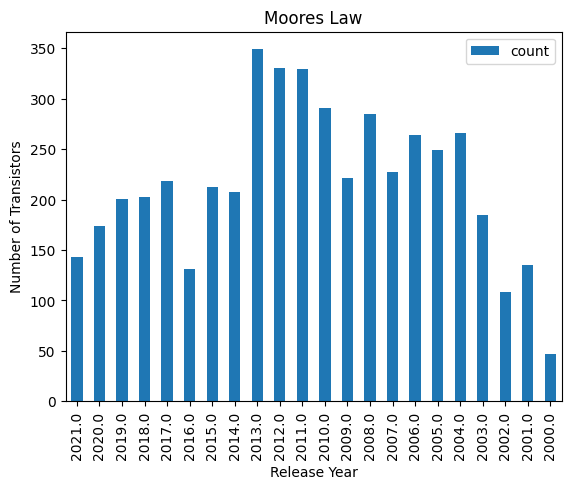

In [ ]:
year = pd.DataFrame(chip['Release Year'].value_counts())
year.sort_values(by='Release Year', ascending = False, inplace=True)

ax = year.plot(kind= 'bar', title= 'Moores Law')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Transistors')

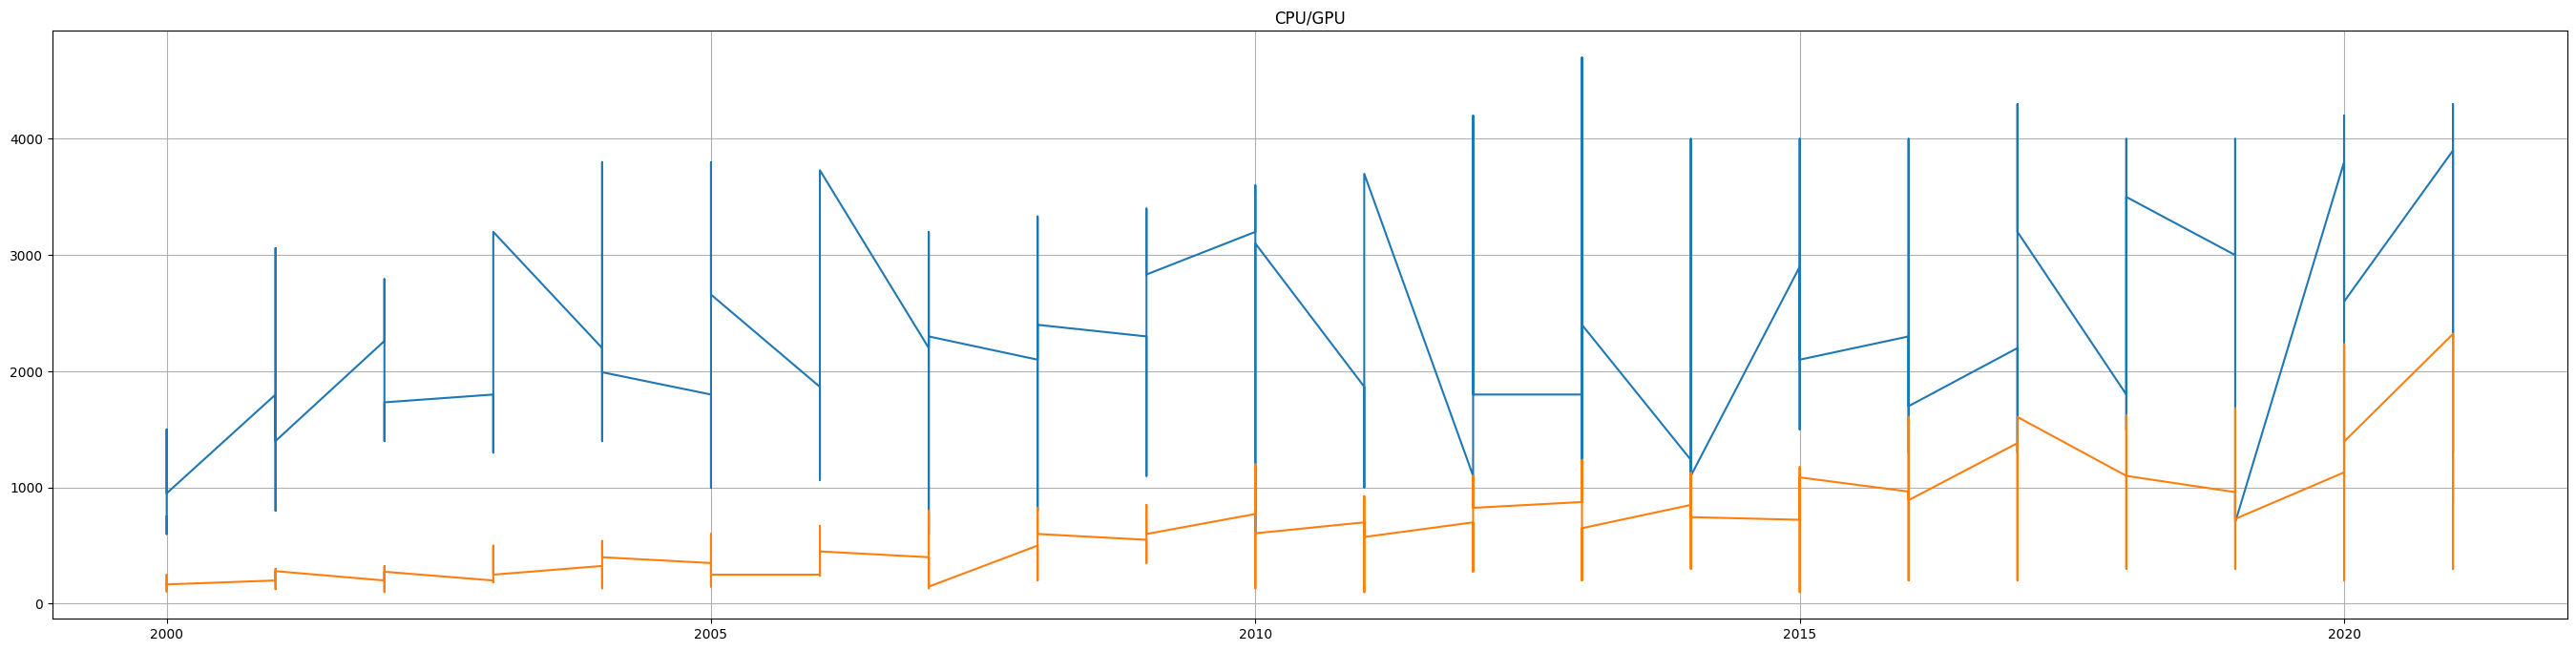

In [ ]:
cpu = chip[chip['Type']=='CPU']
gpu = chip[chip['Type']=='GPU']

plt.figure(figsize=(34,8))
plt.plot(cpu['Release Year'],cpu['Freq (MHz)'])
plt.plot(gpu['Release Year'],gpu['Freq (MHz)'])
plt.title('CPU/GPU')
plt.grid(True)
plt.show()

Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

Text(0, 0.5, 'Size')

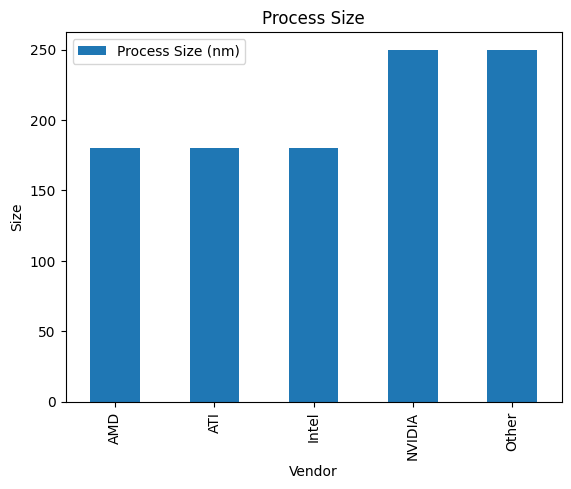

In [ ]:
size = pd.DataFrame(chip.groupby('Vendor').max()['Process Size (nm)'])\
        .plot(kind= 'bar', title= 'Process Size')
size.set_xlabel('Vendor')
size.set_ylabel('Size')

AMD makes the highest number of chips in the world

Text(0, 0.5, 'Number od chips')

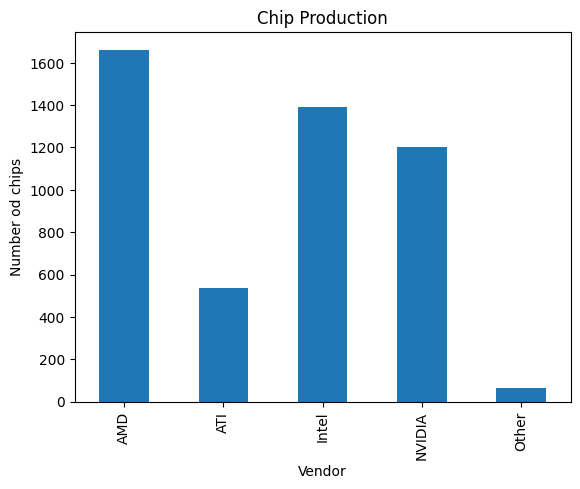

In [ ]:
make = chip.groupby('Vendor')['Vendor'].value_counts()\
       .plot(kind='bar', title= 'Chip Production')
make.set_xlabel('Vendor')
make.set_ylabel('Number od chips')

**Calculate and visualized the correlation among the features**

<Axes: >

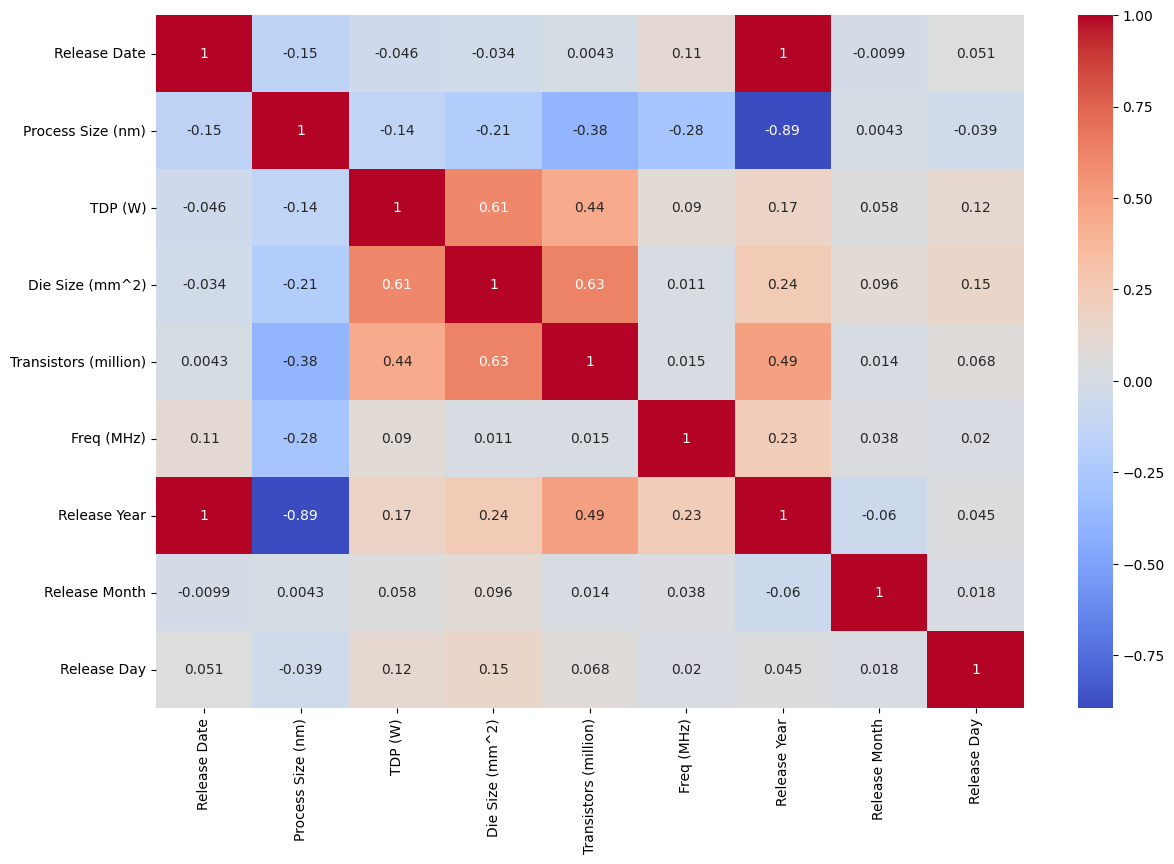

In [ ]:
corr = chip.corr()
plt.figure(figsize= (14,9))
sns.heatmap(corr, annot= True, cmap= 'coolwarm')

**Perfom the correct encoding for your data, in readiness for modelling.**

In [ ]:
train = chip.drop(columns = ['Product','Release Date'])

In [ ]:
train.head(3)

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Vendor,Release Year,Release Month,Release Day
0,CPU,65.0,45.0,77.000000,122.000000,2200.0,AMD,2007.0,2.0,20.0
1,CPU,14.0,35.0,192.000000,4800.000000,3200.0,AMD,2018.0,9.0,6.0
2,CPU,10.0,28.0,188.440445,1929.922279,2600.0,Intel,2020.0,9.0,2.0


In [ ]:
train['Type'].unique()

array(['CPU', 'GPU'], dtype=object)

In [ ]:
train['Vendor'].unique()

array(['AMD', 'Intel', 'Other', 'NVIDIA', 'ATI'], dtype=object)

In [ ]:
train['Type_label'] = le.fit_transform(train['Type'])
train['Vendor_label'] = le.fit_transform(train['Vendor'])

In [ ]:
train.head(3)

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Vendor,Release Year,Release Month,Release Day,Type_label,Vendor_label
0,CPU,65.0,45.0,77.000000,122.000000,2200.0,AMD,2007.0,2.0,20.0,0,0
1,CPU,14.0,35.0,192.000000,4800.000000,3200.0,AMD,2018.0,9.0,6.0,0,0
2,CPU,10.0,28.0,188.440445,1929.922279,2600.0,Intel,2020.0,9.0,2.0,0,2
